Your code sample should aim to accomplish the following tasks:
- Given a set of multiple connected linestrings, write a Python script that splits each linestring every 30 metres, and adds a point at each location where the line has been split.
- Information should be stored for each point that indicates which linestrings it intersects.
- Finally, the script should return the projection of the linestring and point datasets, the total length of all linestrings, and how many points have been created.

Data Import

In [106]:
import geopandas as gpd
import matplotlib as plt

In [107]:
# read in geopackage as geodataframe using geopandas 
lines = gpd.read_file("linestrings.gpkg")

In [177]:
lines.head()

,id,aoi_id,ef_type,ef_subtype,rank,length,rivernameid1,rivernameid2,geometry
0,a8bff057-b883-4ab2-8589-74761cfce177,57d17da0-8b6f-4e43-a0b7-02e91ff9adc6,1,10,1,78.133038,NaN,NaN,"LINESTRING (4347036.991 2614983.555, 4347028.6..."
1,01c3f93f-c09d-4fc6-a4c6-86805c6cd93f,57d17da0-8b6f-4e43-a0b7-02e91ff9adc6,1,10,1,227.358308,NaN,NaN,"LINESTRING (4346392.550 2616744.063, 4346386.4..."
2,215ee6ba-7b61-4fad-951f-ea0f82b06ccc,57d17da0-8b6f-4e43-a0b7-02e91ff9adc6,1,10,1,878.815271,NaN,NaN,"LINESTRING (4347418.685 2616940.081, 4347404.4..."
3,25529fe0-fb53-416e-bcdf-d844cef2d756,57d17da0-8b6f-4e43-a0b7-02e91ff9adc6,1,10,1,672.702038,NaN,NaN,"LINESTRING (4348277.557 2616059.380, 4348270.2..."
4,500f3f1e-5207-4a56-a79f-0e3dd6f6e17d,57d17da0-8b6f-4e43-a0b7-02e91ff9adc6,1,10,1,769.655102,NaN,NaN,"LINESTRING (4347657.113 2616188.980, 4347655.7..."


<Axes: >

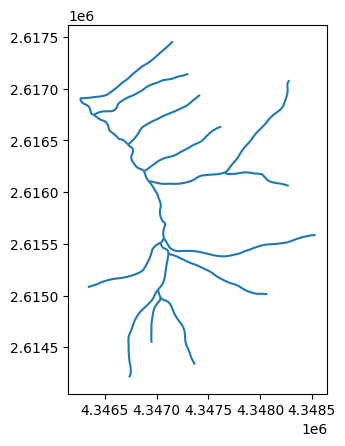

In [239]:
lines.plot()

In [228]:
# check coordinate reference system for lines
lines.crs

<Projected CRS: EPSG:3347>
Name: NAD83 / Statistics Canada Lambert
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada - onshore and offshore - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon.
- bounds: (-141.01, 38.21, -40.73, 86.46)
Coordinate Operation:
- name: Statistics Canada Lambert
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [230]:
# total length of all lines using length col values
lines['length'].sum()

14716.298530519905

In [233]:
# total length of all lines using geometery and length function in geopandas
lines['geometry'].length.sum()

14417.950199486597

In [223]:
from shapely.ops import substring
from shapely.geometry import Point

# initialise variables as empty lists
r = []
points = []
fid = []

# iterate through each row in the gdf
for i, row in lines.iterrows():

    # store id and geometry for each iteration 
    id = row['id']
    geom = row['geometry']

    # intialise distance variable at 0
    d = 0
    # if distance is less than or equal to the length of the linestring
    while d <= geom.length:
        # split line geom using substring() every 30 metres  
        r = substring(geom, start_dist=d, end_dist=d+30)
        # save first point as point geom
        point = Point(r.coords[0])
        # append point geom to points list
        points.append(point) 
        # save feature id for each line 
        fid.append(id)
        # incremently add 30 to distance var
        d += 30

a8bff057-b883-4ab2-8589-74761cfce177
01c3f93f-c09d-4fc6-a4c6-86805c6cd93f
215ee6ba-7b61-4fad-951f-ea0f82b06ccc
25529fe0-fb53-416e-bcdf-d844cef2d756
500f3f1e-5207-4a56-a79f-0e3dd6f6e17d
62fb0a39-2994-4e98-bf8e-ce090559c28e
63ca45db-d800-4463-aeea-e70bad23fd8a
6db8f15b-ef17-404f-abe7-e78a56420c3a
7b431928-1e97-4b26-9c6a-070484b7b637
7f5b5fe8-3b0e-46f5-a661-d490d3b8e9ef
7fe6c6f5-20f8-45df-83e1-8e4e7115fddf
86c0c48f-c1ae-4c93-bcff-7d03c3d5df8f
a138a54d-19a5-4bbe-9a2e-4f79851b0774
b62685cd-1c08-4901-92ef-df7528133c1e
cc891c50-f139-4d6b-9d07-867b65f14c4a
ce027447-02c2-4fae-9dc8-80e1b831f78e
d8f1dde8-1fa4-4787-a628-4190169e176d
da933b4d-1350-42a4-aa31-69904a509bb5
e1d7602a-93f4-401a-9d97-a11cdcc6a24f
f099723e-a506-4893-bfb7-5b1c97dc81c7
f6b31093-ffc0-4f60-9bb2-608a65a7b354
fd5cc3d0-feb2-4faf-bd5f-3a3a58157752


In [244]:
# save points as a geodataframe
points_gdf = gpd.GeoDataFrame({'id': fid, 'geometry':points}, crs='EPSG:3347')
# print points coordinate reference system
points_gdf.crs

<Projected CRS: EPSG:3347>
Name: NAD83 / Statistics Canada Lambert
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada - onshore and offshore - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon.
- bounds: (-141.01, 38.21, -40.73, 86.46)
Coordinate Operation:
- name: Statistics Canada Lambert
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [245]:
points_gdf.head()

,id,geometry
0,a8bff057-b883-4ab2-8589-74761cfce177,POINT (4347036.991 2614983.555)
1,a8bff057-b883-4ab2-8589-74761cfce177,POINT (4347025.298 2615011.132)
2,a8bff057-b883-4ab2-8589-74761cfce177,POINT (4347017.668 2615040.096)
3,01c3f93f-c09d-4fc6-a4c6-86805c6cd93f,POINT (4346392.550 2616744.063)
4,01c3f93f-c09d-4fc6-a4c6-86805c6cd93f,POINT (4346368.046 2616761.157)


In [246]:
# total number of generated points
len(points_gdf)

493

In [247]:
# total number of generated points grouped by id
points_gdf.groupby(['id']).agg({'geometry': 'count'})

,geometry
id,
01c3f93f-c09d-4fc6-a4c6-86805c6cd93f,8
215ee6ba-7b61-4fad-951f-ea0f82b06ccc,29
25529fe0-fb53-416e-bcdf-d844cef2d756,22
500f3f1e-5207-4a56-a79f-0e3dd6f6e17d,26
62fb0a39-2994-4e98-bf8e-ce090559c28e,30
63ca45db-d800-4463-aeea-e70bad23fd8a,30
6db8f15b-ef17-404f-abe7-e78a56420c3a,5
7b431928-1e97-4b26-9c6a-070484b7b637,35
7f5b5fe8-3b0e-46f5-a661-d490d3b8e9ef,53


<Axes: >

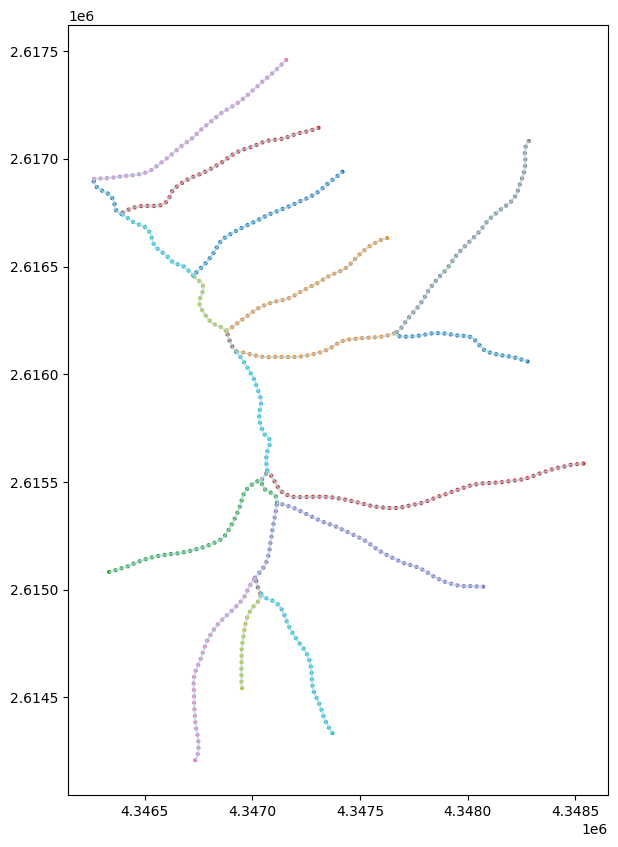

In [266]:
import matplotlib.pyplot as plt

# plt.figure()
# ax = plt.gca()

# lines.plot(color='lightblue', linewidth=2)
# points.plot(ax=ax, column='id', cmap='Set1', markersize=50, legend=True)

fig, ax = plt.subplots(figsize=(10, 10))
lines.plot(ax=ax, alpha=0.7, color="lightblue")
points_gdf.plot(ax=ax, column = 'id', markersize=4)

In [267]:
# write a shapefile
points_shp = 'points_30m.shp'
points_gdf.to_file(points_shp)